In [31]:
pip install matplotlib textblob


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#load the data from the csv files
training_data = pd.read_csv('/Users/jazucena/Downloads/EECS448/wine_somMLier-main/cleaned_wine_training_data.csv')

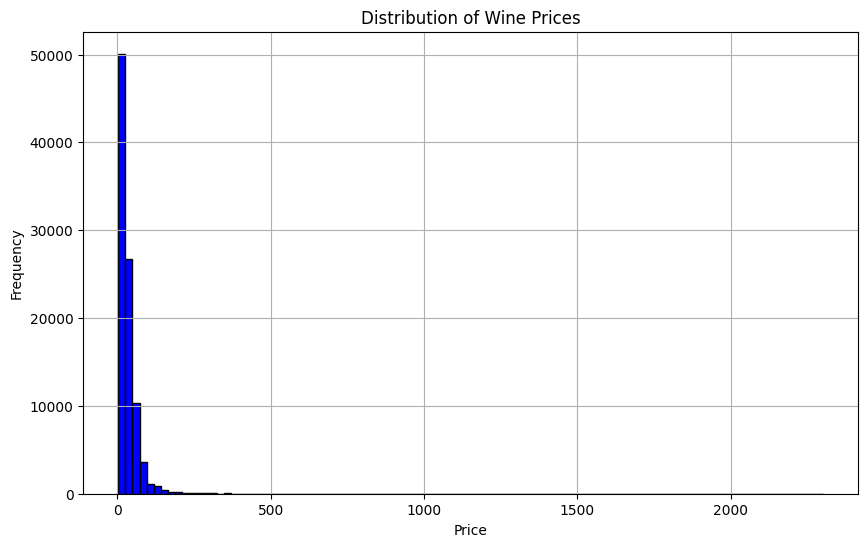

In [33]:
plt.figure(figsize=(10, 6))
plt.hist(training_data['price'], bins=100, color='blue', edgecolor='black')
plt.title('Distribution of Wine Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

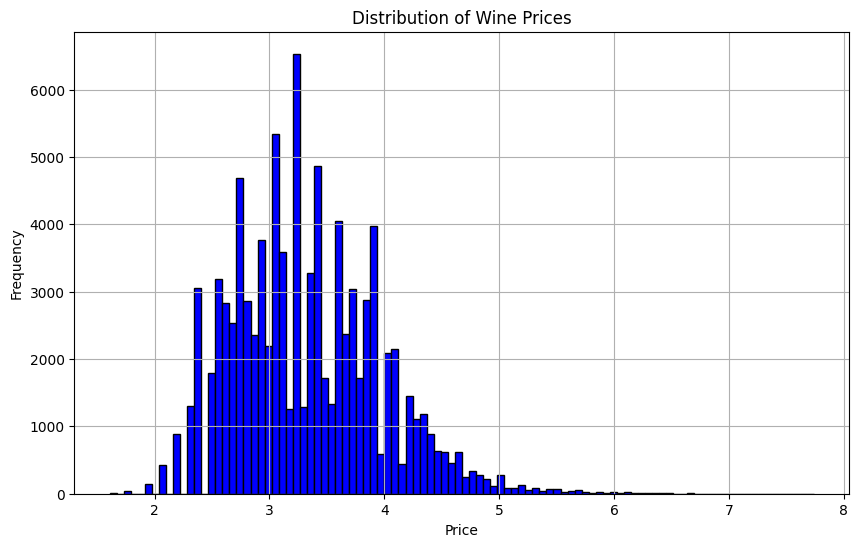

In [34]:
log_prices = np.log(training_data['price'] + 1)  # Adding 1 to avoid log(0)
plt.figure(figsize=(10, 6))
plt.hist(log_prices, bins=100, color='blue', edgecolor='black')
plt.title('Distribution of Wine Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [35]:
#Price Anomaly Detection
mean_price = training_data['price'].mean()
sd_price = training_data['price'].std()
hurdle_rate = 3
hurdle = mean_price + hurdle_rate*sd_price

print("Mean Price: ", mean_price)
print("Standard Deviation: ", sd_price)
print("Hurdle: ", hurdle)

#price is skewed right -> log? 
price_anomalies = training_data[training_data['price'] > hurdle]
print("Number of wines greater than ", hurdle_rate, " standard deviations from the mean: ", price_anomalies.size)

print("Price anomalies:")
print(price_anomalies[['title', 'price']])


Mean Price:  34.564780128559875
Standard Deviation:  37.45773458078617
Hurdle:  146.9379838709184
Number of wines greater than  3  standard deviations from the mean:  19788
Price anomalies:
                                                    title  price
12      Volpaia 2007 Il Puro Casanova  (Chianti Classico)  158.0
85      Jean-Luc and Paul Aegerter 2014  Corton Vergennes  170.0
91              Viñedos de Paganos 2012 La Nieta  (Rioja)  149.0
95      Castell 2006 Casteller Schlossberg Beerenausle...  169.0
108                                                   NaN  283.0
...                                                   ...    ...
101521                                                NaN  253.0
101562  Geh. Rat Dr. von Bassermann-Jordan 2008 Deides...  245.0
101589            Gaja 2007 Sorì Tildìn Nebbiolo (Langhe)  440.0
101617  Grgich Hills 2010 Yountville Selection Estate ...  195.0
101652               Louis Latour 2014  Bâtard-Montrachet  430.0

[1164 rows x 2 columns]


In [38]:
from textblob import TextBlob

def calc_sentiment_score(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    return sentiment_score

sentiment_scores = training_data['description'].apply(calc_sentiment_score)
hurdle_score = sentiment_scores.mean() + 0.5  # You can adjust this threshold as needed

positive_anomalies = training_data[sentiment_scores > hurdle_score]
negative_anomalies = training_data[sentiment_scores < hurdle_score]

print("Positive Sentiment Anomalies:")
print(positive_anomalies[['title', 'description', 'sentiment_score']])
print("\nNegative Sentiment Anomalies:")
print(negative_anomalies[['title', 'description', 'sentiment_score']])

Positive Sentiment Anomalies:
                                                    title  \
119     Château Léoville Las Cases 2012 Le Petit Lion ...   
394     Paradise Ridge 2003 Rockpile Vineyard Merlot (...   
438     Tasca d'Almerita 2009 Sallier de la Tour Nero ...   
482     Domaine de la Mordorée 2007 Re:NAISSANCE Merlo...   
675                                                   NaN   
...                                                   ...   
99920                                                 NaN   
100361  Brian Carter Cellars 2013 Abracadabra Red (Col...   
101085                                                NaN   
101129                                                NaN   
101353  Syncline 2013 Boushey Vineyard Syrah (Yakima V...   

                                              description  sentiment_score  
119     – barrel sample ripe fruity wine smooth tannin...         0.700000  
394                   smell taste vegetal successful wine         0.750000  
438   